# 时间序列分析 — ARIMA
----
自回归积分滑动平均模型是由Box和Jenkins于70年代初提出的著名时间序列预测方法，又称为box-jenkins模型。
	
ARIMA（p，d，q）称为差分自回归移动平均模型，AR是自回归， p为自回归项； MA为移动平均，q为移动平均项数，d为时间序列成为平稳时所做的差分次数。
	
所谓ARIMA模型，是指**将非平稳时间序列转化为平稳时间序列，然后将因变量仅对它的滞后值以及随机误差项的现值和滞后值进行回归所建立的模型。**
	
根据原序列是否平稳以及回归中所含部分的不同，ARIMA模型包括移动平均过程（MA）、自回归过程（AR）、自回归移动平均过程（ARMA）以及ARIMA过程。

适用于平稳序列或者通过差分而平稳的序列的预测分析


## 1 - 基本概念
----



## ARIMA实战案例
---
使用ARIMA模型进行时间序列分析的过程如下：

    获取被观测系统时间序列数据；
    
    对数据绘图，观测是否为平稳时间序列；对于非平稳时间序列要先进行d阶差分运算，化为平稳时间序列；
    
    经过第二步处理，已经得到平稳时间序列。要对平稳时间序列分别求得其自相关系数ACF 和偏自相关系数PACF ，通过对自相关图和偏自相关图的分析，得到最佳的阶层 p 和阶数 q
    
    由以上得到的d、q、p ，得到ARIMA模型。然后开始对得到的模型进行模型检验。



C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


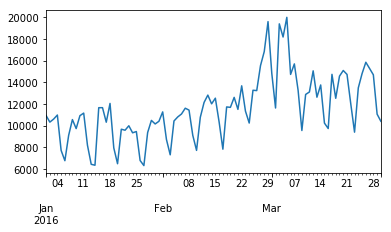

In [1]:
import pandas as pd
import numpy as np
from scipy import  stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
import matplotlib.pyplot as plt

% matplotlib inline

# 输入数据，查看
dta=[10930,10318,10595,10972,7706,6756,9092,10551,9722,10913,11151,8186,6422,
6337,11649,11652,10310,12043,7937,6476,9662,9570,9981,9331,9449,6773,6304,9355,
10477,10148,10395,11261,8713,7299,10424,10795,11069,11602,11427,9095,7707,10767,
12136,12812,12006,12528,10329,7818,11719,11683,12603,11495,13670,11337,10232,
13261,13230,15535,16837,19598,14823,11622,19391,18177,19994,14723,15694,13248,
9543,12872,13101,15053,12619,13749,10228,9725,14729,12518,14564,15085,14722,
11999,9390,13481,14795,15845,15271,14686,11054,10395]

dta = pd.Series(dta, index=pd.date_range('20160101',periods=90))
dta = dta.astype('float64')
# dta.index = pd.Index(sm.tsa.datetools.dates_from_range('2001','2090'))
dta.plot(figsize=(6,3))

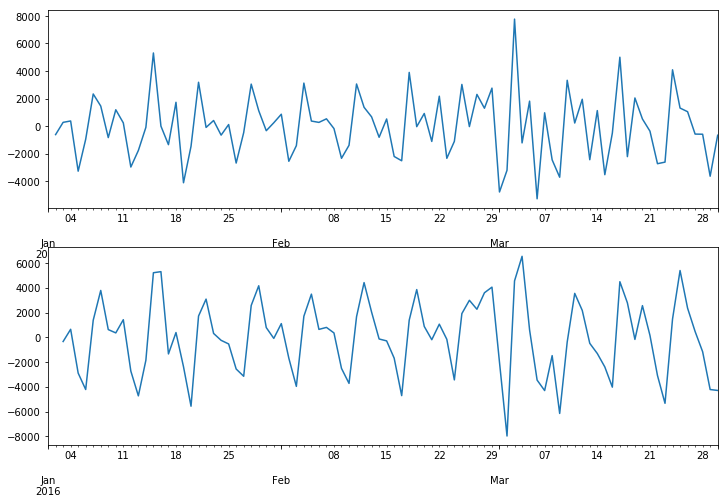

In [2]:
# 一阶差分，使序列更平稳
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(211)
diff1 = dta.diff(1)
diff1.plot(ax=ax1)

# 顺便看看二阶差分的效果
ax2= fig.add_subplot(212)
diff2 = dta.diff(2)
diff2.plot(ax=ax2)

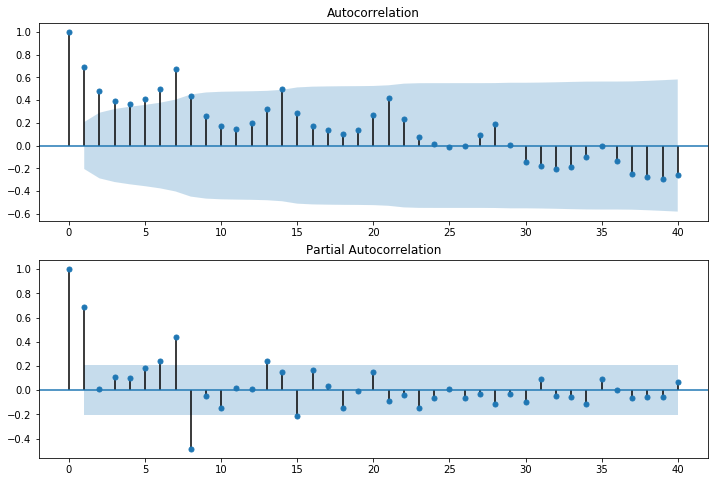

In [3]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta,lags=40,ax=ax2)

In [4]:
arma_mod20 = sm.tsa.ARIMA(dta,(7,1,0)).fit()
print(arma_mod20.aic,arma_mod20.bic,arma_mod20.hqic)
arma_mod30 = sm.tsa.ARIMA(dta,(0,1,1)).fit()
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)
arma_mod40 = sm.tsa.ARIMA(dta,(7,1,1)).fit()
print(arma_mod40.aic,arma_mod40.bic,arma_mod40.hqic)
arma_mod50 = sm.tsa.ARIMA(dta,(8,1,0)).fit()
print(arma_mod50.aic,arma_mod50.bic,arma_mod50.hqic)

1579.702554873728 1602.1002822 1588.73043601
1632.3203732818517 1639.78628239 1635.32966699


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1581.0916056807678 1605.97796938 1591.12258472
1581.395783629899 1606.28214733 1591.42676267


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


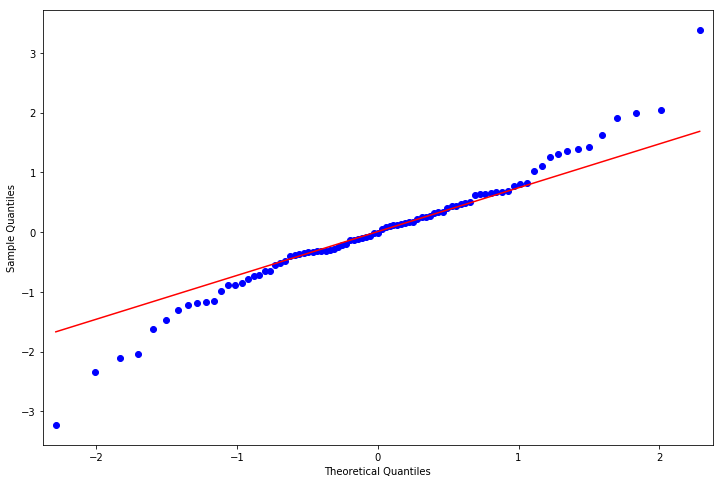

In [5]:
resid = arma_mod20.resid #残差
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

In [13]:
dta.shift?


2016-03-31    3280.731260
2016-04-01    4496.512748
2016-04-02    1814.565595
2016-04-03     -12.192944
2016-04-04   -1257.266991
2016-04-05   -2981.663203
2016-04-06   -2742.795186
2016-04-07    2188.325024
2016-04-08    3609.218100
2016-04-09    1266.778559
2016-04-10    -352.918452
Freq: D, dtype: float64


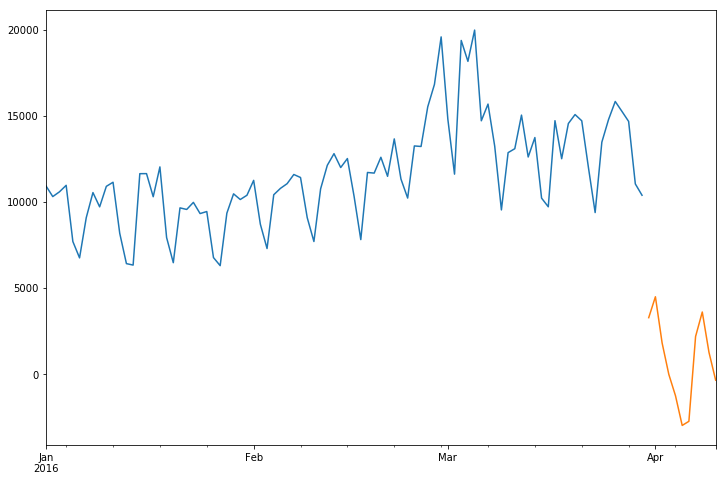

In [14]:
predict = arma_mod50.predict('2016-03-31', '2016-04-10', dynamic=True)
pred_shift = predict.shift(1)
pred_shift.fillna(0, inplace=True)
predict_sunspots = predict.add(pred_shift)
print(predict_sunspots)
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.ix['2016-01-01':].plot(ax=ax)
predict_sunspots.plot(ax=ax)

In [11]:
predict_sunspots_s = arma_mod50.predict('2016-03-31', '2016-04-10', dynamic=True)
print(predict_sunspots_s)
predict_sunspots = predict_sunspots_s.
print(predict_sunspots)

2016-03-31    3280.731260
2016-04-01    1215.781488
2016-04-02     598.784108
2016-04-03    -610.977052
2016-04-04    -646.289939
2016-04-05   -2335.373263
2016-04-06    -407.421923
2016-04-07    2595.746947
2016-04-08    1013.471154
2016-04-09     253.307405
2016-04-10    -606.225858
Freq: D, dtype: float64
2016-03-31    2064.949773
2016-04-01     616.997380
2016-04-02    1209.761159
2016-04-03      35.312888
2016-04-04    1689.083324
2016-04-05   -1927.951341
2016-04-06   -3003.168870
2016-04-07    1582.275793
2016-04-08     760.163749
2016-04-09     859.533263
2016-04-10            NaN
Freq: D, dtype: float64


## 参考资料
---
* SPSS统计分析方法及应用 第3版_薛微 2013 - 第16章 时间序列分析
* [python时间序列分析之ARIMA](http://blog.csdn.net/u010414589/article/details/49622625)
* [大熊猫淘沙 - python时间序列分析](http://www.cnblogs.com/foley/p/5582358.html)
*